### Pertemuan 9


In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn import metrics

In [52]:
data = pd.read_csv('D:\WidiPythonEnv\Machine-Learning/5210411135\data\konsumen2.csv')
data.keys()

Index(['Gaji', 'Pengeluaran'], dtype='object')

In [53]:
dataku = pd.DataFrame(data)
dataku.head()

,Gaji,Pengeluaran
0,2500,1750
1,3800,4200
2,3900,3800
3,4350,5500
4,4400,3200


In [54]:
ft = np.asarray(data)
ft

array([[ 2500,  1750],
       [ 3800,  4200],
       [ 3900,  3800],
       [ 4350,  5500],
       [ 4400,  3200],
       [ 5500,  5450],
       [ 5600,  5950],
       [ 5750,  4100],
       [ 6850,  6050],
       [ 6900,  8500],
       [ 7250,  9500],
       [ 7350,  6050],
       [ 7500,  8500],
       [ 7800,  9500],
       [ 8200,  8300],
       [ 8500,  6500],
       [ 8550,  8400],
       [ 8750,  6000],
       [ 9100, 10500],
       [ 9100,  8500]], dtype=int64)

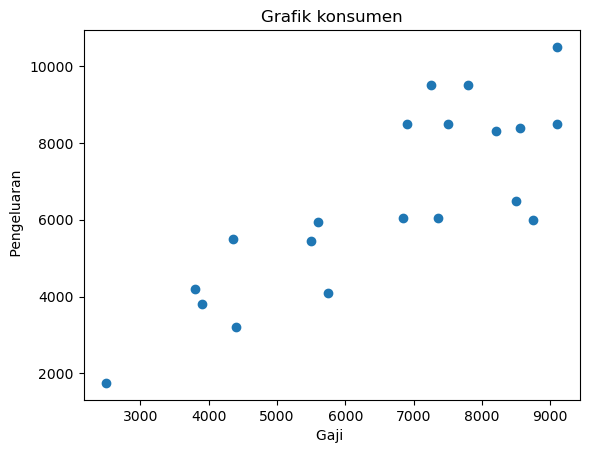

In [62]:
plt.scatter(ft[:, 0], ft[:, 1], label='True position')
plt.xlabel("Gaji ")
plt.ylabel(" Pengeluaran")
plt.title('Grafik konsumen')
plt.show()


In [63]:
kmeans = KMeans(n_clusters=2, random_state=4)
kmeans.fit(ft)

c:\Users\Asus Vivobook\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Asus Vivobook\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, random_state=4)

In [64]:
print(kmeans.cluster_centers_)

[[7987.5  8025.  ]
 [4475.   4243.75]]


In [58]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [59]:
metrics.silhouette_score(ft, kmeans.labels_, metric='euclidean')


0.5554663423362192

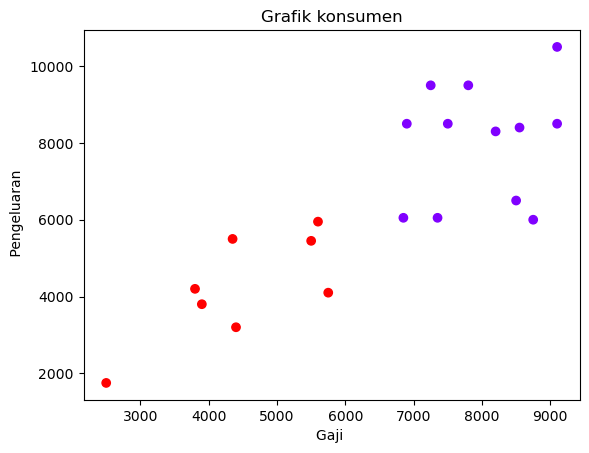

In [60]:
plt.scatter(ft[:, 0], ft[:, 1],  c=kmeans.labels_, cmap='rainbow')
plt.xlabel("Gaji ")
plt.ylabel(" Pengeluaran")
plt.title('Grafik konsumen')
plt.show()


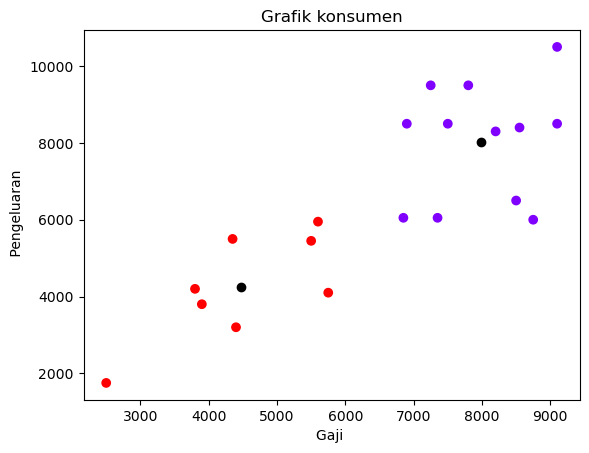

In [65]:
plt.scatter(ft[:, 0], ft[:, 1],  c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],  color='black')
plt.xlabel("Gaji ")
plt.ylabel(" Pengeluaran")
plt.title('Grafik konsumen')
plt.show()


In [68]:
ks = 10

sil_score = np.zeros(ks)
for k in range(1, ks+1):
    kmeans = KMeans(n_clusters=k, random_state=4)
    kmeans.fit(ft)

    if k != 1:
        s_score = metrics.silhouette_score(
            ft, kmeans.labels_, metric='euclidean')
        sil_score[k-1] = s_score

sil_score


c:\Users\Asus Vivobook\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Asus Vivobook\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Asus Vivobook\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Asus Vivobook\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can a

array([0.        , 0.55546634, 0.46139304, 0.46112701, 0.45770278,
       0.40415459, 0.41441123, 0.427705  , 0.42968032, 0.44850758])

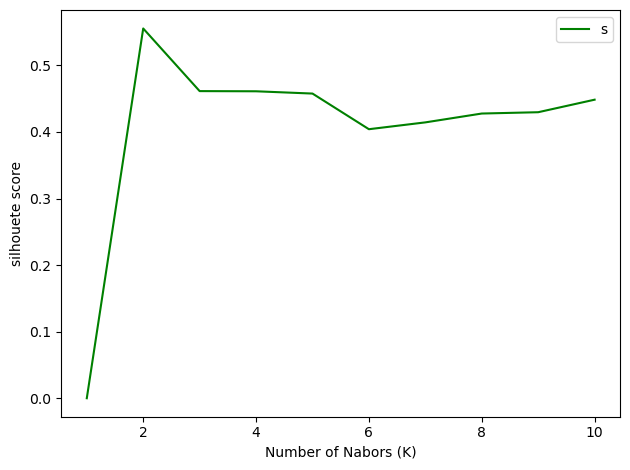

In [75]:
plt. plot(range(1, ks+1), sil_score, 'g')
plt.legend(('silhouete score'))
plt.ylabel('silhouete score')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
